# Análisis de series de tiempo
## Trabajo práctico N° 1 

Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) Generar series de tiempo con valores aleatorios y graficarlas

In [2]:
serie_normal = np.random.normal(10,1.5,100)
serie_chicuad = np.random.chisquare(5,100)
serie_exp = np.random.exponential(5,100)

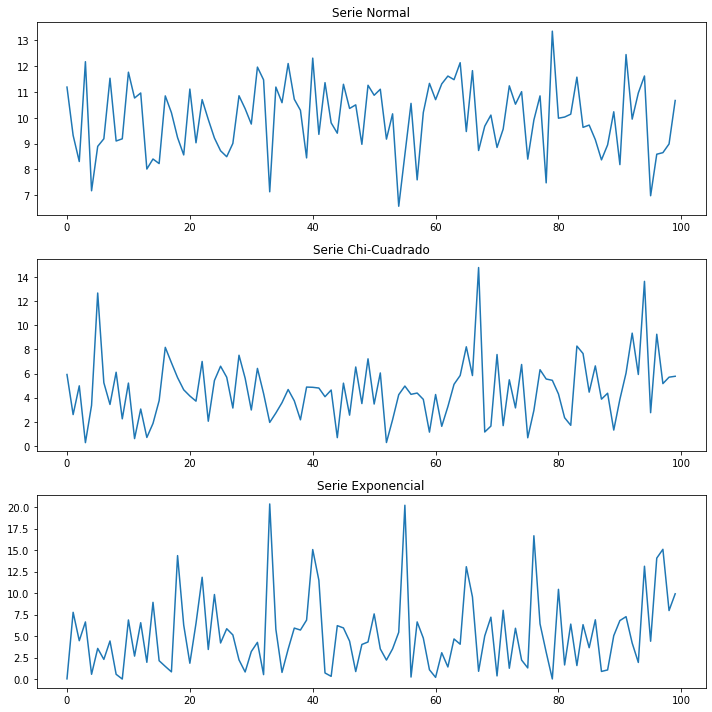

In [3]:
fig, axs = plt.subplots(3,1, figsize=(10,10))
axs[0].plot(serie_normal)
axs[0].set_title('Serie Normal')
axs[1].plot(serie_chicuad)
axs[1].set_title('Serie Chi-Cuadrado')
axs[2].plot(serie_exp)
axs[2].set_title('Serie Exponencial')

plt.tight_layout()
plt.show()

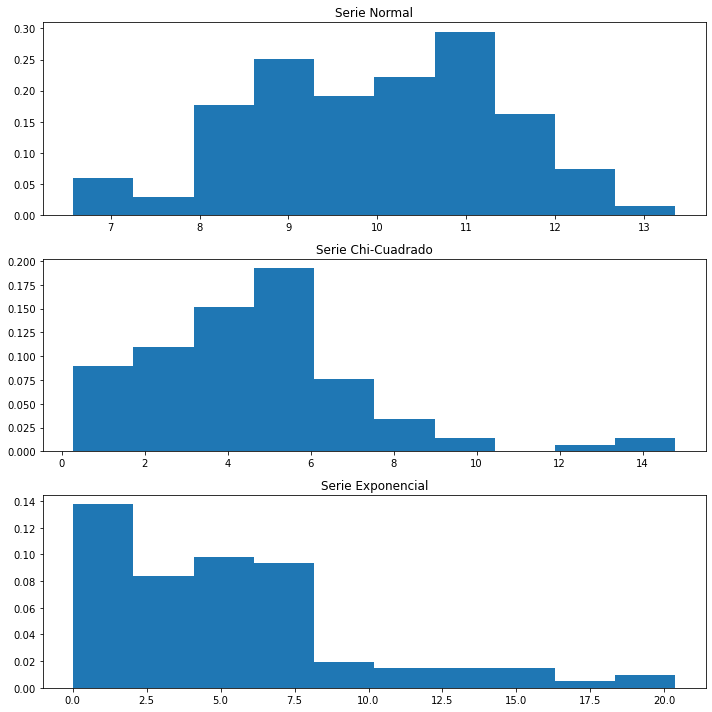

In [4]:
fig, axs = plt.subplots(3,1, figsize=(10,10))
axs[0].hist(serie_normal,10, density=True)
axs[0].set_title('Serie Normal')
axs[1].hist(serie_chicuad,10, density=True)
axs[1].set_title('Serie Chi-Cuadrado')
axs[2].hist(serie_exp,10, density=True)
axs[2].set_title('Serie Exponencial')
plt.tight_layout()
plt.show()

### 2) Graficar una serie de tiempo de los ejemplos del repositorio https://github.com/charlieromano/TimeSeries/tree/main/Datasets

#### a) YPFd 2000-2021

In [5]:
ypfd_2000_2021 = pd.read_csv('https://raw.githubusercontent.com/charlieromano/TimeSeries/main/Datasets/YPFD.2000.2021.csv')

In [6]:
ypfd_2000_2021.loc[:,'fechaHora'] = pd.to_datetime(ypfd_2000_2021.loc[:,'fechaHora'])

Text(0.5, 1.0, 'YPFd 2000-2021')

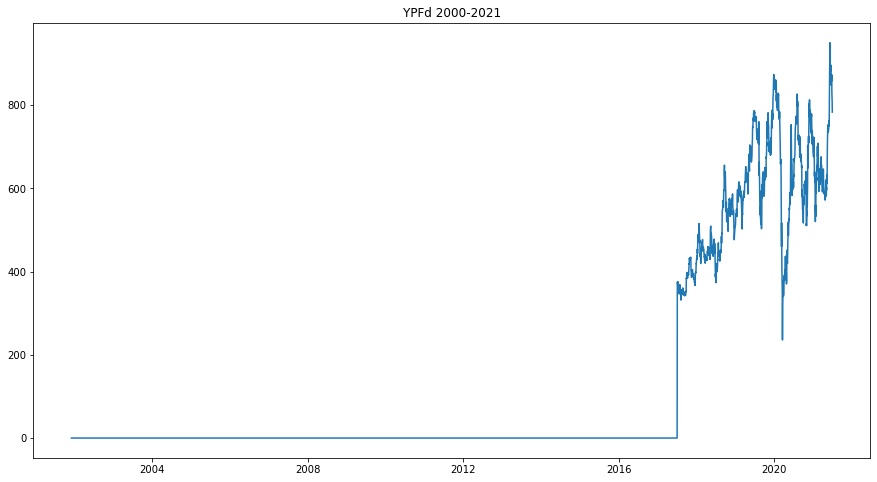

In [7]:
plt.subplots(figsize=(15,8))
plt.plot(ypfd_2000_2021.fechaHora, ypfd_2000_2021.ultimoPrecio)
plt.title('YPFd 2000-2021')

A priori, lo que se puede apreciar de esta serie de tiempo es que empieza a tomar valores por encima de 0 a partir de 2017 o 2018. Por esto, tomaremos sólo los valores de los años para los cuales el precio es positivo.

Text(0.5, 1.0, 'YPFd 2000-2021')

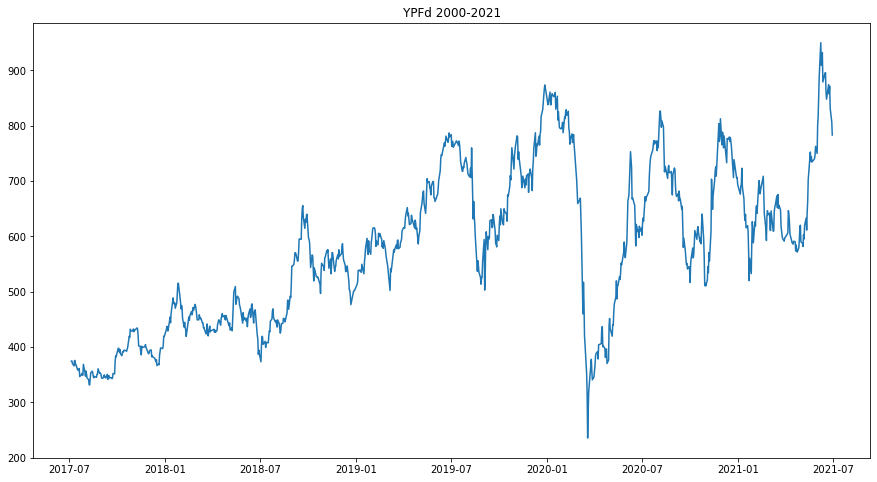

In [8]:
ypfd_2000_2021_only_pos = ypfd_2000_2021.loc[ypfd_2000_2021.ultimoPrecio >0, :].sort_values(by='fechaHora')
plt.subplots(figsize=(15,8))
plt.plot(ypfd_2000_2021_only_pos.fechaHora, ypfd_2000_2021_only_pos.ultimoPrecio)
plt.title('YPFd 2000-2021')

Al ver esta serie podemos notar que no es una serie estacionaria y que presenta una tendencia ascendente. Por otro lado, también se ve una gran caída en los primeros meses de 2020 que empezó a revertirse a mediados de ese año superando en Julio de 2021 el máximo histórico alcanzado previamente en Enero de 2020.

Si bien el precio tiene muchos altibajos a lo largo del tiempo, no podría identificar a partir del gráfico un ciclo claro.

#### b) BYMA

In [9]:
byma = pd.read_csv('https://raw.githubusercontent.com/charlieromano/TimeSeries/main/Datasets/BYMA.csv')

Text(0.5, 1.0, 'BYMA')

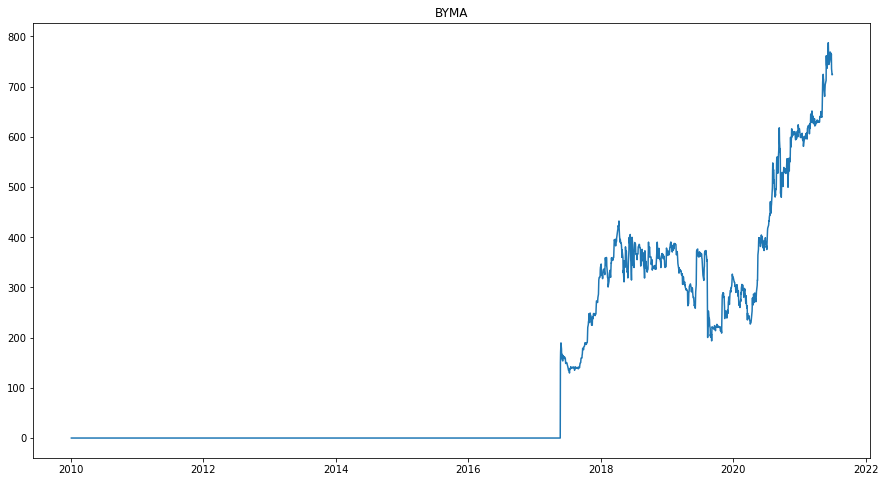

In [10]:
byma.loc[:,'fechaHora'] = pd.to_datetime(byma.loc[:,'fechaHora'])
plt.subplots(figsize=(15,8))
plt.plot(byma.fechaHora, byma.ultimoPrecio)
plt.title('BYMA')

Al igual que la anterior, esta serie parece tener valores distintos de cero a partir de mediados o fines de 2017. Por esto, veremos el comportamiento de la misma sólo para estos días con valores positivos.

Text(0.5, 1.0, 'BYMA')

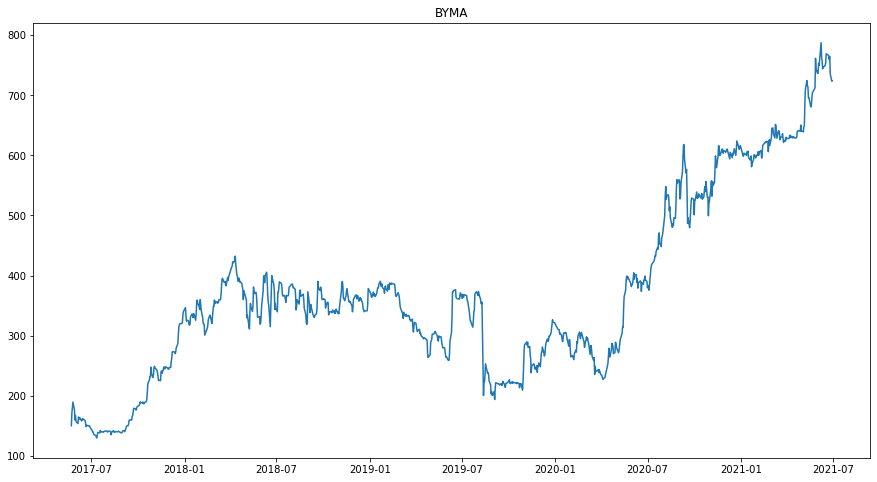

In [11]:
byma_only_pos = byma.loc[byma.ultimoPrecio >0, :].sort_values(by='fechaHora')
plt.subplots(figsize=(15,8))
plt.plot(byma_only_pos.fechaHora, byma_only_pos.ultimoPrecio)
plt.title('BYMA')

En esta serie no estacionaria podemos identificar una tendencia general positiva, aunque compuesta por distintas subas y bajas a lo largo de la misma. Por ejemplo: 
*   07/2017 - 03/2018 se aprecia una pronunciada tendencia alcista con pequeñas correcciones.
*   03/2018 - 02/2019 el precio se mantiene relativamente estable, con mucha variación pero sin una clara tendencia positiva o negativa.
*   02/2019 - 05/2020 en general el precio disminuye con el tiempo con algunas subas excepcionales en 07/2019 y 01/2020. 
*   A partir de 05/2020 la serie adquiere una gran tendencia alcista. 


#### b) RIGO 2012-2021

In [12]:
rigo_2012_2021 = pd.read_json('https://raw.githubusercontent.com/charlieromano/TimeSeries/main/Datasets/RIGO.2012.2021.json')

Text(0.5, 1.0, 'RIGO 2012-2021')

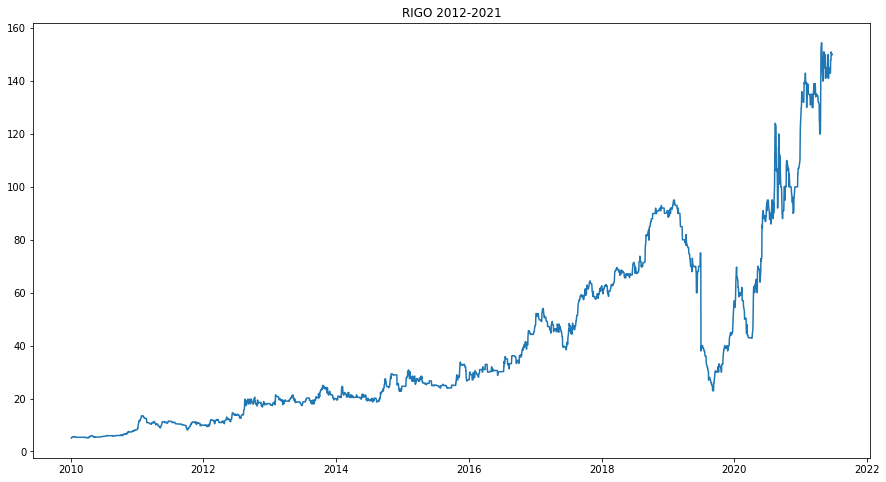

In [13]:
rigo_2012_2021.loc[:,'fechaHora'] = pd.to_datetime(rigo_2012_2021.loc[:,'fechaHora'])
plt.subplots(figsize=(15,8))
plt.plot(rigo_2012_2021.fechaHora, rigo_2012_2021.ultimoPrecio)
plt.title('RIGO 2012-2021')

En esta serie también no estacionaria presenta en casi todo su dominio una tendencia creciente. Sólo durante el período de principios de 2019 a fines de  2021 podemos apreciar una caída en el precio.

En general, a partir del gráfico podríamos arriesgarnos a decir que la varianza es bastante menor que la de las series anteriores.